In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import scipy.stats
import parte1
import parte2
from ipywidgets import interact, FloatSlider, IntSlider, SelectionSlider, Layout

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parte 1: Juego de cartas

Sea una mazo de naipes francés con 52 cartas divididas en cuatro palos: corazones, treboles, diamantes y picas. Cada palo tiene 13 cartas: el as, los números del 2 al 10, la jota, la reina y el rey. Si barajamos las cartas desordenando el mazo. 

> ¿Cuál es la probabilidad de que aparezcan **al menos** dos reyes juntos?

La función `probabilidad_dos_reyes_juntos` que se muestra a continuación realiza una simulación de Monte Carlo para resolver este problema. Sin embargo la implementación está incompleta. Se pide que

1. Completen la implementación de `crear_naipes()` en `parte1.py`
1. Completen la implementación de `barajar()` en `parte1.py`
1. Completen la implemetanción de `reyes_juntos()` en `parte1.py`
1. Imprima la probabilidad de obtener dos reyes versus la cantidad de `repeticiones`. Considere $10$, $100$, $1000$ y $10000$ repeticiones como mínimo
1. La solución analítica para este problema es $0.217376$. Compare su resultado con esta solución analítica

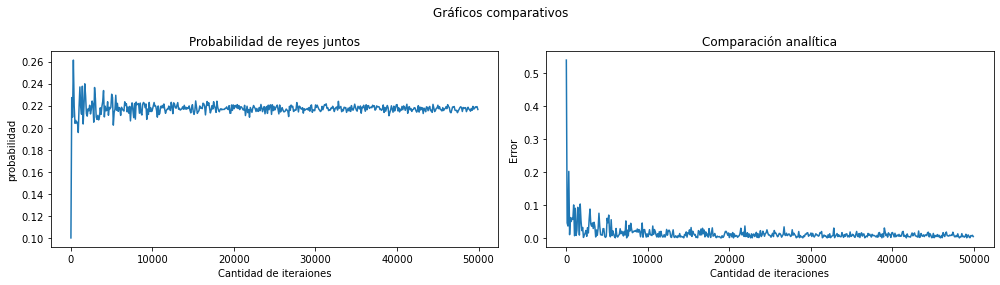

In [34]:
fig, ax = plt.subplots(1,2,figsize=(14, 4), tight_layout=True)
fig.suptitle('Gráficos comparativos') 

def probabilidad_dos_reyes_juntos(repeticiones=100):
    dos_reyes_juntos = 0
    for n in range(repeticiones):
        naipes = parte1.crear_naipes()
        naipes = parte1.barajar(naipes)
        dos_reyes_juntos += parte1.reyes_juntos(naipes)
    return float(dos_reyes_juntos)/repeticiones

b = list(range(10,50000,100))
rst = []
err = []
for i in b:
    resultado = probabilidad_dos_reyes_juntos(i)
    rst.append(resultado)
    
    error = abs(0.217376-resultado)/0.217376
    err.append(error)
ax[0].plot(b,rst)
ax[0].set_xlabel('Cantidad de iteraiones')
ax[0].set_ylabel('probabilidad')
ax[0].set_title('Probabilidad de reyes juntos')    

ax[1].plot(b,err)
ax[1].set_xlabel('Cantidad de iteraciones')
ax[1].set_ylabel('Error')
ax[1].set_title('Comparación analítica');
    

# Parte 2: Caminata aleatoria económica

Se tiene el precio de cierre de las acciones de Apple por día entre 2009 y 2019. 

> Utilice una simulación por Monte-Carlo para predecir el precio en los próximos 500 días. 

Para esto considere un modelo de movimiento aleatorio de tipo Browniano

$$
P_t = P_{t-1} e^{\alpha + z_t \sigma}
$$

donde la variación en el precio de cierre está explicada por un componente constante y otro aleatorio

- $\alpha$ es el promedio de $\log (P_t / P_{t-1})$
- $\sigma$ es la desviación estándar de $\log (P_t / P_{t-1})$
- $z_t \sim N(0, 1)$, es decir un número aleatorio con distribución normal estándar

En base a esto 

- Complete la implementación `fit_model` en `parte2.py`
- Complete la implementación `brownian_motion` en `parte2.py`
- Genere 1000 posibles futuros y muestre graficamente el futuro promedio con su desviación estándar. Muestre también el mejor futuro y el peor futuro 

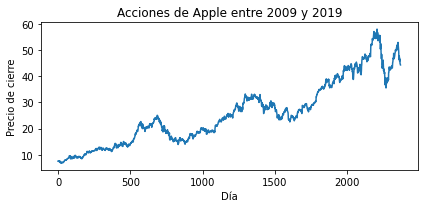

In [17]:
with open("data/prices_apple.pkl", "rb") as f:
    prices = pickle.load(f)
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(prices)
ax.set_xlabel('Día')
ax.set_ylabel('Precio de cierre')
ax.set_title('Acciones de Apple entre 2009 y 2019');

In [18]:
alpha, sigma = parte2.fit_model(prices)

In [19]:
futuros_posibles = []
promedio = []
genera = 1000
for i in range(genera):
    future_prices = np.zeros(shape=(500,))
    future_prices[0] = prices[-1]
    for t in range(1, len(future_prices)):
        future_prices[t] = parte2.brownian_motion(future_prices[t-1], alpha, sigma)
    futuros_posibles.append(future_prices)

In [20]:
media=[]
std=[]
for a in futuros_posibles:
    media.append(a.mean())
    std.append(a.std())

In [21]:
#Buscamos la mejor media de todos los futuros posibles
print("Media global analítica: ",np.mean(media))
margen=0.2
best_prom=0
for a in media:
    if a<np.mean(media)+margen and a>np.mean(media)-margen:
        best_prom=a    
print("Mediana global de futuros posibles: ",best_prom)

Media global analítica:  56.02448193120772
Mediana global de futuros posibles:  56.109626693795654


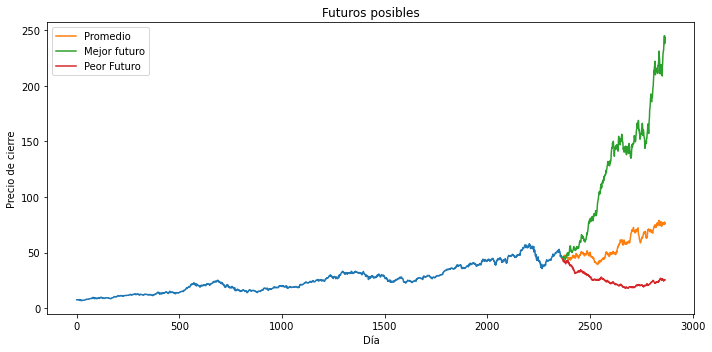

In [22]:
fig, ax = plt.subplots(figsize=(10, 5), tight_layout=True)
ax.plot(prices)
x = list(range(len(prices)-1,len(prices)+499))
ax.set_title("Futuros posibles")
ax.plot(x,futuros_posibles[media.index(best_prom)],label="Promedio")
ax.plot(x,futuros_posibles[media.index(max(media))],label="Mejor futuro")
ax.plot(x,futuros_posibles[media.index(min(media))],label ="Peor Futuro")
ax.set_xlabel('Día')
ax.set_ylabel('Precio de cierre')
ax.legend()
plt.show()